<a href="https://colab.research.google.com/github/Ravi-shankar-iit/Freight_Project/blob/main/Classification_based_on_Credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


from sklearn.preprocessing import StandardScaler,  OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, log_loss, recall_score, accuracy_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle
import re

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2

In [17]:
# Load cs-training and cs-test datasets
df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('//content/drive/MyDrive/test.csv')

# Display the first few rows to understand the structure
print("Training Data:")
print(df.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilizat

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [12]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [19]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [20]:
for col in df.columns:
    print(df[col].value_counts())
    print("total unique value counts:", len(df[col].value_counts()))
    print("\n")

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
total unique value counts: 100000


Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
total unique value counts: 12500


Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
total unique value counts: 8


Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64
total unique value counts: 1

In [21]:
# check multicollinearity

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [22]:
pd.DataFrame(df.select_dtypes(include = "number")).corr().style.map(color_custom)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


In [23]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good
8,0x160e,CUS0x21b1,January,Rick Rothackerj,28,004-07-5839,,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,Standard
10,0x1610,CUS0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,Standard
16,0x161a,CUS0x2dbc,January,Langep,34,486-85-3974,,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0x25fdf,CUS0x8600,June,Sarah McBridec,28,031-35-0942,,20002.88,1929.906667,10,...,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,Standard
99992,0x25fe6,CUS0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,LowspentSmallvaluepayments,189.64108,Poor
99994,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,HighspentMediumvaluepayments,410.256158,Poor
99995,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,HighspentLargevaluepayments,479.866228,Poor


In [24]:
# Check and Fill empty values with np.nan
empty_values = df[df.eq('').any(axis=1)]

df.loc[empty_values.index] = df.loc[empty_values.index].replace('', np.nan)

In [25]:
df.shape

(100000, 28)

In [26]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,7062
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


# EDA: Handling missing values

## 1. Age

In [27]:
def non_numeric_values(df, column_name):

    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'

    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)

    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]

    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)

    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

{'-'}


In [28]:
def clean_age(age):
    try:
        return int(age)
    except ValueError:
        return None

df['Age'] = df['Age'].str.replace('-', '')
df['Age'] = df['Age'].apply(clean_age)

In [29]:
def truncate_last_two_digits(age):
    if age > 99:
        return age // 100
    else:
        return age


df['Age'] = df['Age'].apply(truncate_last_two_digits)


df.Age

,Age
0,23
1,23
2,5
3,23
4,23
...,...
99995,25
99996,25
99997,25
99998,25


In [30]:
# make age valid for credit score

unvalid_age = np.where(df["Age"] < 18)[0]

In [32]:
 # fill with nan unvalid data

df["Age"][unvalid_age] = np.NaN
df.Age.unique()

array([23., nan, 28., 34., 54., 55., 21., 31., 33., 75., 30., 24., 44.,
       45., 40., 41., 32., 35., 36., 39., 37., 20., 46., 26., 42., 19.,
       48., 38., 50., 43., 22., 64., 70., 18., 27., 25., 53., 47., 57.,
       56., 29., 71., 49., 82., 69., 76., 51., 52., 83., 84., 66., 79.,
       68., 60., 73., 63., 74., 78., 72., 81., 65., 67., 86., 61., 85.,
       77., 80., 62., 58., 59., 99., 95.])

In [33]:
mode_age = df.groupby('Customer_ID')["Age"].transform(lambda x: x.mode()[0]
                                                      if not x.mode().empty
                                                      else np.nan)
mode_global = df["Age"].mode()[0]

df["Age"] = df["Age"].fillna(mode_age.fillna(mode_global))

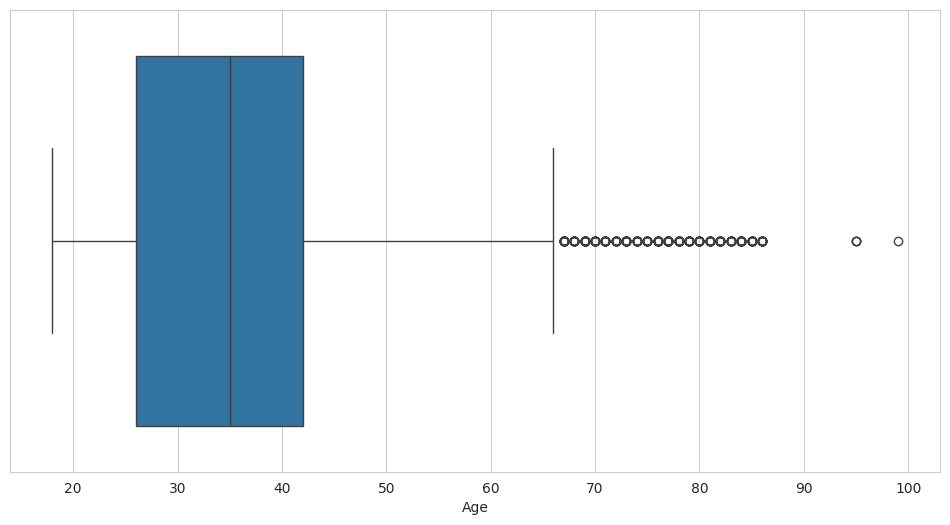

In [34]:
sns.boxplot(df, x= df.Age);

In [35]:
df.Age.isna().sum()

0

## 2. Occupation

In [36]:
df.Occupation.value_counts()

,count
Occupation,
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
MediaManager,6232
Teacher,6215


In [37]:
df.Occupation.isna().sum()

7062

In [38]:
mode_occupation = df.groupby('SSN')['Occupation'].transform(lambda x: x.mode()[0]
                                                            if not x.mode().empty
                                                            else np.nan)
mode_global = df["Occupation"].mode()[0]

df['Occupation'] = df['Occupation'].fillna(mode_occupation.fillna(mode_global))

In [39]:
df.Occupation.isna().sum()

0

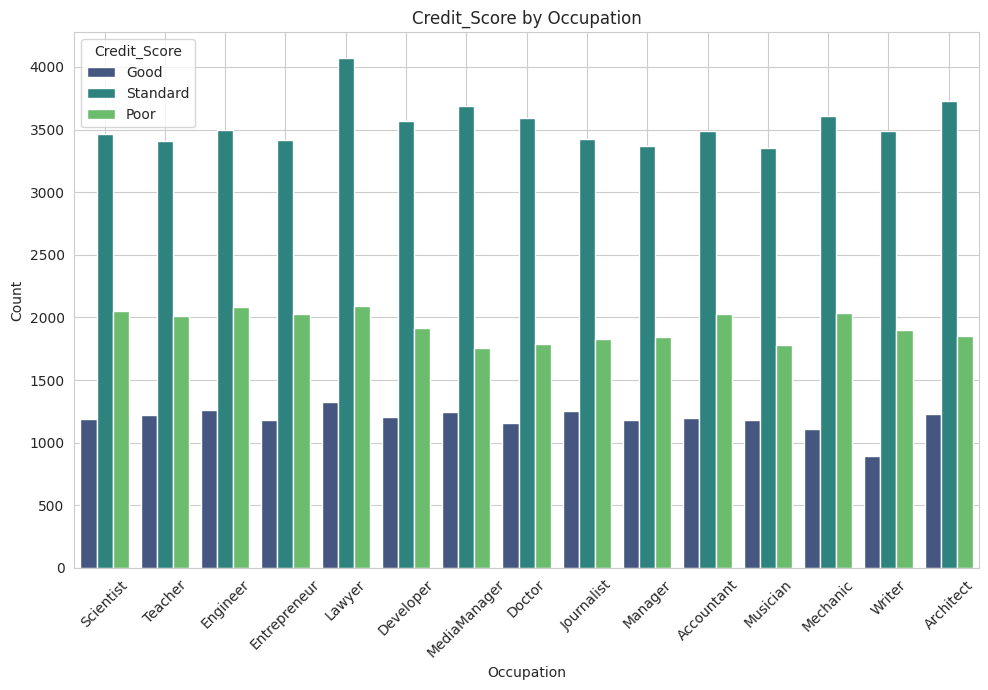

In [40]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Occupation', hue='Credit_Score', data=df, palette="viridis")
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Credit_Score by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Num_Bank_Accounts

In [41]:
non_numeric_values(df, 'Num_Bank_Accounts')

{'-'}

In [42]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count() # find negative

21

In [43]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].abs() # change positive

In [44]:
df['Num_Bank_Accounts'].isna().sum()

0

## 4. Num_of_Loan

In [45]:
non_numeric_values(df, 'Num_of_Loan')

{'-'}

In [46]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique() # find negative

array([-100])

In [47]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative

3876

In [48]:
df['Num_of_Loan'] = df['Num_of_Loan'].abs() # convert positive

In [49]:
df['Num_of_Loan'].isna().sum()

0

## 5. Type_of_Loan

In [50]:
df.Type_of_Loan.value_counts()[:5]


,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240


In [51]:
df['Type_of_Loan'].fillna('Not Specified', inplace=True)

In [52]:
df['Type_of_Loan'].isna().sum()

0

## 6. Delay_from_due_date

In [53]:
non_numeric_values(df, 'Delay_from_due_date')

{'-'}

In [54]:
df.Delay_from_due_date.unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

In [55]:
# cannot be negative
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()

array([-1, -2, -3, -5, -4])

In [56]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

In [57]:
df.Delay_from_due_date.isna().sum()

0

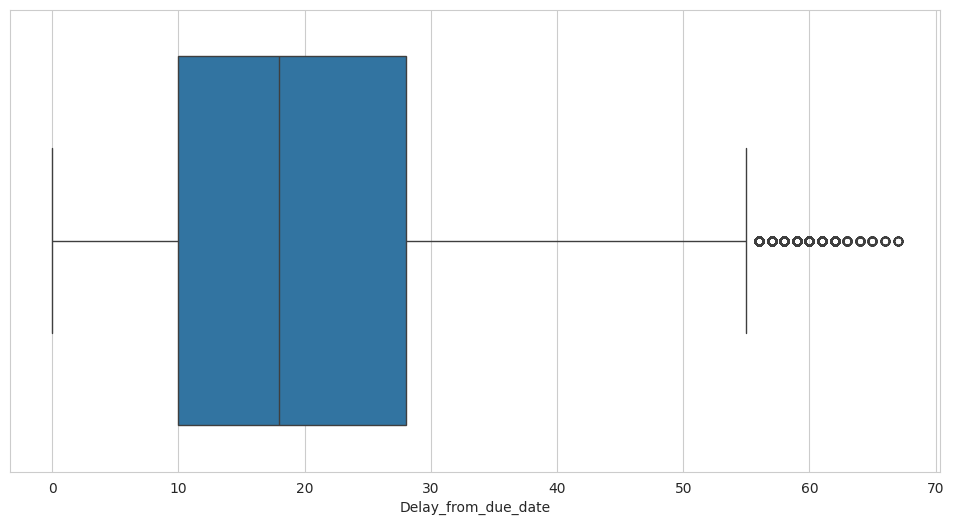

In [58]:
sns.boxplot(data= df, x = df.Delay_from_due_date);

## 6. Num_of_Delayed_Payment

In [59]:
non_numeric_values(df, 'Num_of_Delayed_Payment')


{'-', 'nan'}

In [60]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'],
                                             errors='coerce')
# check negative

df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [61]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

644

In [62]:
# convert positive
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()

In [63]:
df.Num_of_Delayed_Payment.isna().sum()

7002

In [64]:
Num_of_Delay_fill = df.groupby('Num_of_Delayed_Payment').value_counts().mode().iloc[0]

df['Num_of_Delayed_Payment'].fillna(Num_of_Delay_fill, inplace=True)

In [65]:
df['Num_of_Delayed_Payment'].isna().sum()

0

## 7. Changed_Credit_Limit

In [66]:
non_numeric_values(df, 'Changed_Credit_Limit')

{'-', '.', 'nan'}

In [67]:
df['Changed_Credit_Limit'].unique()

array(['11.27', nan, '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [68]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('-', np.nan)

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'],
                                           errors='coerce')

mean_value = df['Changed_Credit_Limit'].mean()

df['Changed_Credit_Limit'].fillna(mean_value, inplace=True)

In [69]:
df['Changed_Credit_Limit'].isna().sum()

0

## 8. Num_Credit_Inquiries

In [70]:
non_numeric_values(df, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [71]:
#check negative
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

In [72]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [73]:
df['Num_Credit_Inquiries'].value_counts()

,count
Num_Credit_Inquiries,
4.0,11271
3.0,8890
6.0,8111
7.0,8058
2.0,8028
...,...
1721.0,1
1750.0,1
2397.0,1


In [74]:
num_of_inq = df['Num_Credit_Inquiries'].value_counts().mode().iloc[0]
df['Num_Credit_Inquiries'].fillna(num_of_inq, inplace=True)

In [75]:
df['Num_Credit_Inquiries'].isna().sum()

0

## 9. Credit_Mix

In [76]:
df.Credit_Mix.value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
Bad,18989


In [77]:
df.Credit_Mix.isna().sum()

20195

In [78]:
# fill as balance

mode_creditmix = df.groupby('Customer_ID')["Credit_Mix"].transform(
                                                        lambda x: x.mode()[0]
                                                        if not x.mode().empty
                                                        else np.nan)
mode_global = df["Credit_Mix"].mode()[0]

df["Credit_Mix"] = df["Credit_Mix"].fillna(mode_creditmix.fillna(mode_global))

In [79]:
df.Credit_Mix.value_counts()

,count
Credit_Mix,
Standard,45848
Good,30384
Bad,23768


In [80]:
df.Credit_Mix.isna().sum()

0

## 10. Credit_History_Age

In [81]:
# fill as balance
mode_creditage = df.groupby('Customer_ID')['Credit_History_Age'].transform(
                                                        lambda x: x.mode()[0]
                                                        if not x.mode().empty
                                                        else np.nan)
mode_global = df['Credit_History_Age'].mode()[0]

df['Credit_History_Age'] = df['Credit_History_Age'].fillna(
                                        mode_creditage.fillna(mode_global))

In [82]:
df['Credit_History_Age'].isnull().sum()

0

In [83]:
# Extract years and months from 'Credit_History_Age'


df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

In [84]:
# Convert years to months and add with months to get total months

df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns

df.drop(columns=['Credit_History_Years', 'Credit_History_Months'],
        inplace=True)

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1602,CUS0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good,265
1,0x1603,CUS0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,No,49.574949,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,Good,265
2,0x1604,CUS0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good,267
3,0x1605,CUS0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good,268
4,0x1606,CUS0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good,269


In [85]:
df['Credit_History_Age_Months'].isna().sum()

0

## 10. Payment_of_Min_Amount

In [86]:
df.Payment_of_Min_Amount.value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [87]:
df['Payment_of_Min_Amount'].isna().sum()

0

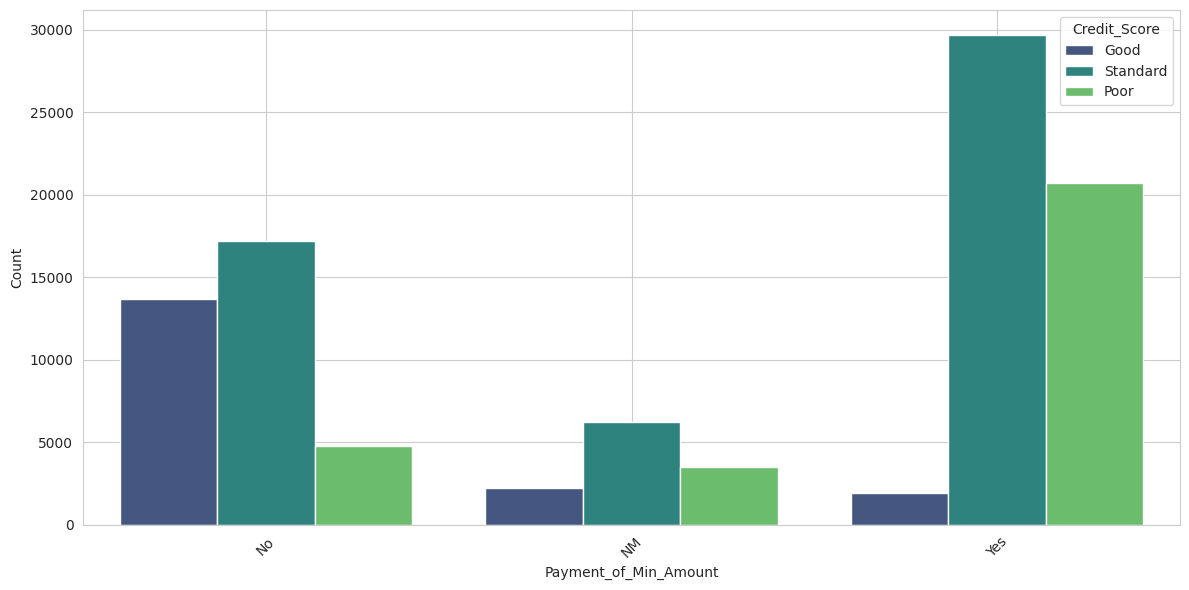

In [88]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df,
              palette="viridis")
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

## Amount_invested_monthly

In [89]:
non_numeric_values(df, 'Amount_invested_monthly')

{'.', 'nan'}

In [90]:
df['Amount_invested_monthly'].value_counts()

,count
Amount_invested_monthly,
10000,4305
0.0,169
80.41529543900253,1
36.66235139442514,1
89.7384893604547,1
...,...
36.541908593249026,1
93.45116318631192,1
140.80972223052834,1


In [91]:
df['Amount_invested_monthly'].isna().sum()

4479

In [92]:
df['Amount_invested_monthly'] = df.groupby(
    'Customer_ID')['Amount_invested_monthly'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [93]:
df['Amount_invested_monthly'].isnull().sum()

0

## Payment_Behaviour

In [94]:
non_numeric_values(df, 'Payment_Behaviour')

{'!@',
 '#%',
 'HighspentLargevaluepayments',
 'HighspentMediumvaluepayments',
 'HighspentSmallvaluepayments',
 'LowspentLargevaluepayments',
 'LowspentMediumvaluepayments',
 'LowspentSmallvaluepayments'}

In [95]:
 # Replace '!@9#%8' with NaN

df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# fill missing values with mode

mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [96]:
df.Payment_Behaviour.value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,33113
HighspentMediumvaluepayments,17540
LowspentMediumvaluepayments,13861
HighspentLargevaluepayments,13721
HighspentSmallvaluepayments,11340
LowspentLargevaluepayments,10425


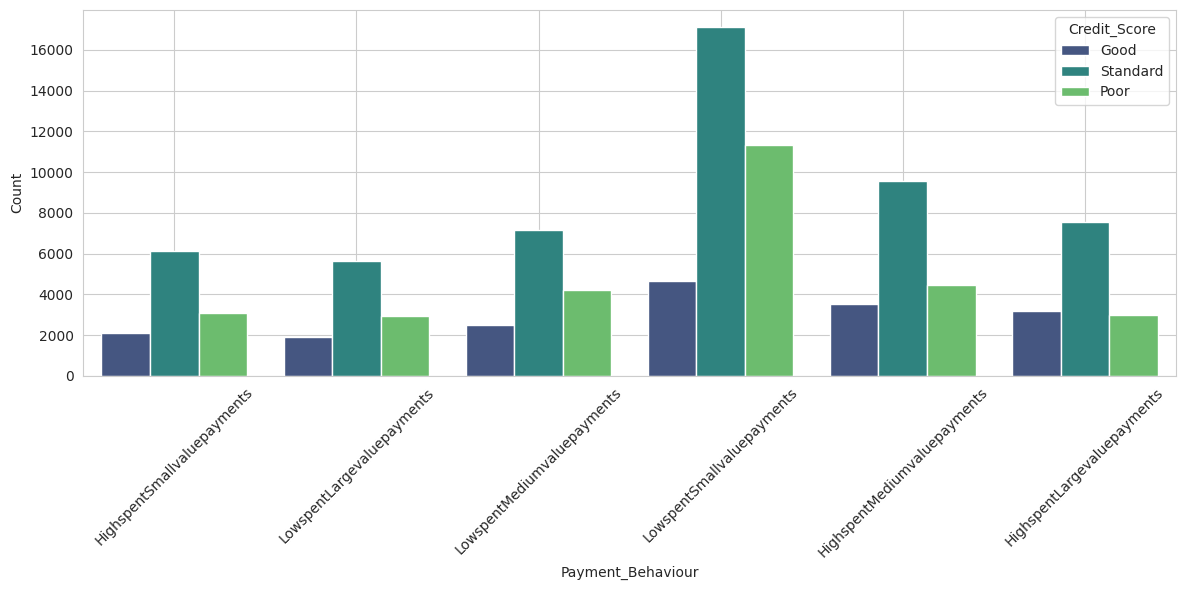

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df,
              palette="viridis")
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Credit_Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,33113
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425


In [99]:
df['Payment_Behaviour'].isna().sum()

0

## Monthly_Balance

In [100]:
non_numeric_values(df, 'Monthly_Balance')

{'-', '.', 'nan'}

In [101]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(str)

df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '').str.replace('-', '')

In [102]:
df.Monthly_Balance.isna().sum()

0

In [103]:
df['Monthly_Balance'].value_counts(ascending=True)

,count
Monthly_Balance,
312.49408867943663,1
260.625831704352,1
606.8303890602195,1
111.99052062106064,1
299.5453745546086,1
...,...
373.29270287694055,1
287.78227008599026,1
393.6736955618808,1


In [104]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

median_value = df['Monthly_Balance'].median()

df['Monthly_Balance'].fillna(median_value, inplace=True)

In [105]:
df['Monthly_Balance'].isna().sum()

0

## Monthly_Inhand_Salary

In [106]:
non_numeric_values(df, 'Monthly_Inhand_Salary')

{'.', 'nan'}

In [107]:
mode_monthlysalary = df.groupby('Customer_ID')[
    'Monthly_Inhand_Salary'].transform(lambda x: x.mode().iloc[0])

df['Monthly_Inhand_Salary'].fillna(mode_monthlysalary, inplace=True)

In [108]:
df['Monthly_Inhand_Salary'].isna().sum()

0

## Drop unnecessary columns

In [109]:
# dropping unnecessary columns for modelling

df = df.drop([
    "ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Month"], axis=1)

df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.28022162236736,High_spent_Small_value_payments,312.494089,Good,265
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,1.0,...,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.629162,Good,265
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.28022162236736,Low_spent_Medium_value_payments,331.209863,Good,267
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.28022162236736,Low_spent_Small_value_payments,223.451310,Good,268
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,1.0,...,Good,809.98,24.797347,No,49.574949,118.28022162236736,High_spent_Medium_value_payments,341.489231,Good,269


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  object 
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  int64  
 5   Num_Credit_Card            100000 non-null  int64  
 6   Interest_Rate              100000 non-null  int64  
 7   Num_of_Loan                100000 non-null  int64  
 8   Delay_from_due_date        100000 non-null  int64  
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Credit_Mix                 100000 non-null  object 
 13  Outstanding_Debt           100

In [111]:
# change types

columns_to_convert = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly']
for col in columns_to_convert:
    df[col] = df[col].str.replace('_', '').astype(float)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Monthly_Inhand_Salary      100000 non-null  float64
 4   Num_Bank_Accounts          100000 non-null  int64  
 5   Num_Credit_Card            100000 non-null  int64  
 6   Interest_Rate              100000 non-null  int64  
 7   Num_of_Loan                100000 non-null  int64  
 8   Delay_from_due_date        100000 non-null  int64  
 9   Num_of_Delayed_Payment     100000 non-null  float64
 10  Changed_Credit_Limit       100000 non-null  float64
 11  Num_Credit_Inquiries       100000 non-null  float64
 12  Credit_Mix                 100000 non-null  object 
 13  Outstanding_Debt           100

In [113]:
# set target column location

Credit_Score = df.pop('Credit_Score')
df['Credit_Score'] = Credit_Score

In [114]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,265,Good
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,1.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,265,Good
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.280222,Low_spent_Medium_value_payments,331.209863,267,Good
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,268,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,1.0,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,269,Good


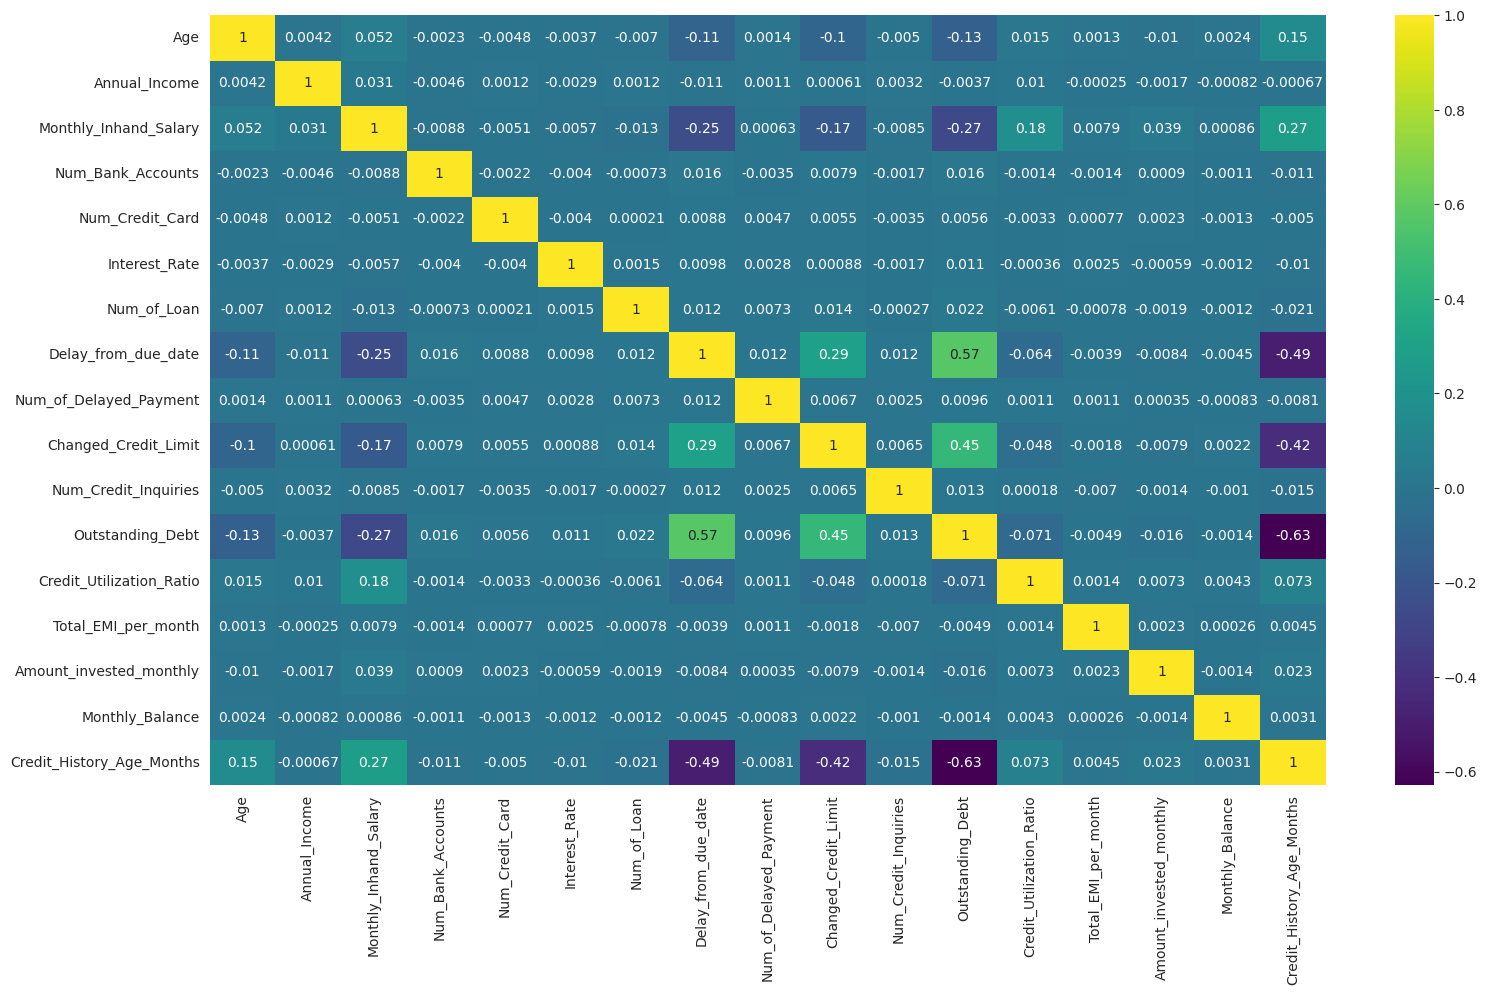

In [115]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot = True, cmap="viridis");

## Outliers

In [116]:
# outlier deletion
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]

        std = selected_column.std()
        mean= selected_column.mean()

        max = mean + (4 * std)
        min =  mean - (4 * std)

        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)

Age Good Index([ 1130,  6005, 10314, 10438, 13034, 23704, 28718, 31217, 34967, 51866,
       61535, 73535, 84261, 99197],
      dtype='int64')
Age Standard Index([ 1654,  4687,  5051,  5052,  5053,  5054,  5055,  8549,  8788, 10431,
       ...
       93237, 94475, 94945, 95620, 96630, 96689, 97667, 99320, 99512, 99776],
      dtype='int64', length=123)
Age Poor Index([   56,  2102,  2902,  4520,  4777,  5048,  5049,  5050,  6532,  6684,
       ...
       91508, 91509, 91511, 92520, 93534, 95513, 95807, 96320, 99012, 99738],
      dtype='int64', length=143)
Annual_Income Good Index([   54,   564,   895,  2684,  3390,  4453,  5254,  5647,  6767,  7420,
       ...
       88289, 88708, 90303, 91686, 93073, 94278, 94336, 96155, 98445, 99264],
      dtype='int64', length=129)
Annual_Income Standard Index([  231,   361,   368,   602,   617,  1253,  1737,  2099,  2303,  2815,
       ...
       98478, 98864, 99107, 99191, 99260, 99280, 99714, 99721, 99882, 99945],
      dtype='int64', length=43

In [117]:
df.shape

(91096, 22)

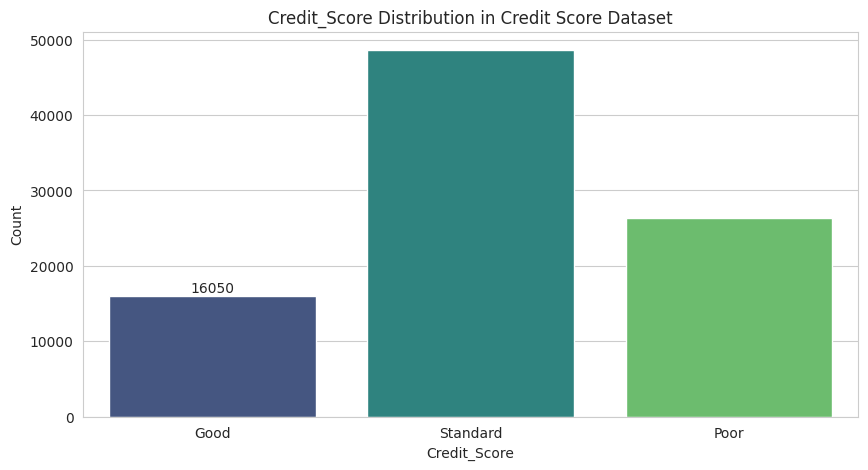

In [118]:
# Distribution of target variable

plt.figure(figsize=(10, 5))
ax=sns.countplot(data=df, x='Credit_Score', palette="viridis")
ax.bar_label(ax.containers[0])
plt.title('Credit_Score Distribution in Credit Score Dataset')
plt.xlabel('Credit_Score')
plt.ylabel('Count')
plt.show()

## Save and read clean data

In [119]:
df.to_csv("Credit_Score_train_cleaned.csv", index=False)

In [122]:
df = pd.read_csv("Credit_Score_train_cleaned.csv")
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,26.822620,No,49.574949,118.280222,High_spent_Small_value_payments,312.494089,265,Good
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4,1,1.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,265,Good
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,...,Good,809.98,28.609352,No,49.574949,118.280222,Low_spent_Medium_value_payments,331.209863,267,Good
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,...,Good,809.98,31.377862,No,49.574949,118.280222,Low_spent_Small_value_payments,223.451310,268,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,1.0,...,Good,809.98,24.797347,No,49.574949,118.280222,High_spent_Medium_value_payments,341.489231,269,Good


## Model Processing
### LabelEncoding for output column

In [123]:
df["Credit_Score"] = LabelEncoder().fit_transform(df["Credit_Score"])
df["Credit_Score"]

,Credit_Score
0,0
1,0
2,0
3,0
4,0
...,...
91091,1
91092,1
91093,1
91094,2


In [124]:
df["Credit_Score"].value_counts()

,count
Credit_Score,
2,48649
1,26397
0,16050


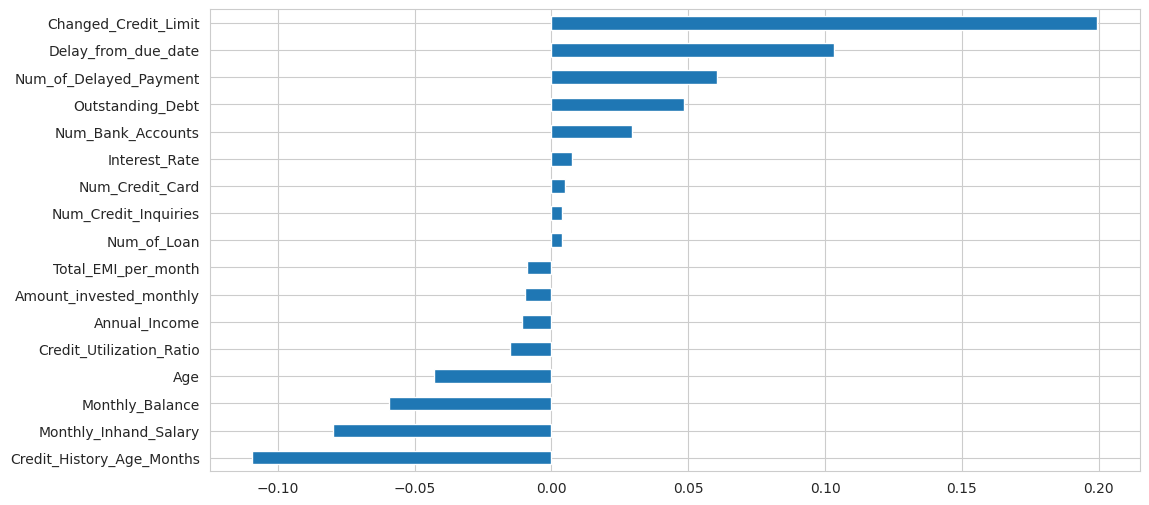

In [125]:
# Correlation of target variable with features after numerical transformation
numerical_df = df.select_dtypes(include=[np.number])

correlation_series = numerical_df.corr()['Credit_Score'][:-1].sort_values()
correlation_series.plot.barh();

## Encoding for categorical columns

In [126]:
# select columns of type 'object'

df.select_dtypes(include=['object']).columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [127]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df[['Payment_Behaviour']])

In [128]:
label_encoder = OrdinalEncoder()
df['Credit_Mix'] = label_encoder.fit_transform(df[['Credit_Mix']])

In [129]:
label_encoder = LabelEncoder()
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [130]:
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [131]:
df.shape

(91096, 22)

In [132]:
# Separate properties and target variable

X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score

In [133]:
y.value_counts(normalize=True) # unbalanced data

,proportion
Credit_Score,
2,0.534041
1,0.289771
0,0.176188


In [134]:
# make smote for unbalanced data
smote = SMOTE()
X, y = smote.fit_resample(X,y)

## Train-Test Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    stratify=y, random_state=42)

In [136]:
df["Credit_Score"].value_counts()

,count
Credit_Score,
2,48649
1,26397
0,16050


In [137]:
y_train.value_counts()

,count
Credit_Score,
0,41352
1,41351
2,41351


####Normalization

In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## ANN Model

In [141]:
model_batchN = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])
model_batchN.compile(optimizer = Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=70,
                               restore_best_weights=True)

model_batchN.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          validation_split=0.1,
          batch_size=512,
          epochs=100,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.5995 - loss: 0.9887 - val_accuracy: 0.7179 - val_loss: 0.7145
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.7134 - loss: 0.7322 - val_accuracy: 0.7298 - val_loss: 0.6809
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7265 - loss: 0.6963 - val_accuracy: 0.7373 - val_loss: 0.6628
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.7319 - loss: 0.6778 - val_accuracy: 0.7392 - val_loss: 0.6533
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7360 - loss: 0.6644 - val_accuracy: 0.7421 - val_loss: 0.6441
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.7388 - loss: 0.6544 - val_accuracy: 0.7418 - val_loss: 0.6366
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.7391 - loss: 0.6488 - val_accuracy: 0.7456 - val_loss: 0.6330
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7411 - loss: 0

In [142]:
model_batchN.evaluate(X_train, y_train)

3877/3877 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8610 - loss: 0.3473


[0.34764811396598816, 0.8610040545463562]

In [143]:
eval_metric(model_batchN, X_train, y_train, X_test, y_test)

3877/3877 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Set:
[[6761   48  488]
 [ 143 6438  717]
 [1022 1369 4907]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7297
           1       0.82      0.88      0.85      7298
           2       0.80      0.67      0.73      7298

    accuracy                           0.83     21893
   macro avg       0.83      0.83      0.82     21893
weighted avg       0.83      0.83      0.82     21893


Train Set:
[[39450    88  1814]
 [  363 37770  3218]
 [ 4789  6971 29591]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     41352
           1       0.84      0.91      0.88     41351
           2       0.85      0.72      0.78     41351

    accuracy                           0.86    124054
   macro avg       0.86      0.86      0.86    124054
weighted avg       0.86      0.86      0.86    124054



## Final Model and Model Deployment

In [144]:
X.shape,y.shape

((145947, 21), (145947,))

In [145]:
scaler = StandardScaler().fit(X)

In [146]:
# Save StandardScaler

pickle.dump(scaler, open("scaler_credit_score", 'wb'))

In [147]:
X_scaled = scaler.transform(X)

In [148]:
final_model = Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])
final_model.compile(optimizer = Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

final_model.fit(x=X_scaled, y=y, batch_size=512, epochs=100)

Epoch 1/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.6146 - loss: 0.9669
Epoch 2/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7155 - loss: 0.7361
Epoch 3/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.7261 - loss: 0.6975
Epoch 4/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7327 - loss: 0.6734
Epoch 5/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7358 - loss: 0.6592
Epoch 6/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.7379 - loss: 0.6505
Epoch 7/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.7422 - loss: 0.6424
Epoch 8/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7448 - loss: 0.6398
Epoch 9/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.7462 - loss: 0.6325
Epoch 10/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.7456 - loss: 0.6315
Epoch 11/100
286/286 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.7481 - loss: 0.6259
Epoch 12/100
286/28

In [149]:
# Save Model

final_model.save('final_model_ANN_credit_score.h5')

## Test Data Cleaning and Preparing

In [150]:
df2 = test_data = pd.read_csv('//content/drive/MyDrive/test.csv')
df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [151]:
df2 = df2.replace("_", "", regex=True)
df2[df2.eq('').any(axis=1)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
4,0x1616,CUS0x21b1,September,Rick Rothackerj,28,004-07-5839,,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,HighspentLargevaluepayments,485.2984336755923
6,0x1618,CUS0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,HighspentLargevaluepayments,452.30230675990265
7,0x1619,CUS0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
13,0x162f,CUS0xb891,October,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,4.0,,632.46,36.280475,18 Years and 0 Months,No,16.415452,29.393311428984493,HighspentLargevaluepayments,455.440320244524
16,0x163a,CUS0x1cdb,September,Deepaa,22,615-06-7821,Developer,35547.71,2853.309167,7,...,4.0,,943.86,34.729842,31 Years and 4 Months,Yes,0.000000,59.36605764456292,HighspentMediumvaluepayments,475.96485902210367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,0x25fcd,CUS0xf16,December,Maria Sheahanb,45,868-70-2218,MediaManager,16680.35,NaN,1,...,8.0,,897.16,25.793227,22 Years and 0 Months,NM,41.113561,40.89305193681736,LowspentLargevaluepayments,340.79630413992334
49991,0x25fd9,CUS0xaf61,December,Chris Wickhamm,50,133-16-7738,Writer,37188.1,3097.008333,1,...,3.0,,620.64,36.498383,30 Years and 8 Months,No,33013.000000,238.3993828976901,LowspentLargevaluepayments,257.095501010799
49994,0x25fe4,CUS0x8600,November,Sarah McBridec,29,031-35-0942,,20002.88,1929.906667,10,...,12.0,Bad,3571.7,27.027812,6 Years and 6 Months,Yes,60.964772,50.84684680498023,HighspentSmallvaluepayments,341.179047488264
49995,0x25fe5,CUS0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,LowspentSmallvaluepayments,275.53956951573343


In [152]:
empty_values = df2[df2.eq('').any(axis=1)]

# Fill empty values with np.nan

df2.loc[empty_values.index] = df2.loc[empty_values.index].replace('', np.nan)

In [153]:
df2= df2.dropna()

In [154]:
df2.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [155]:
df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772
1,0x160b,CUS0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196
5,0x1617,CUS0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,LowspentLargevaluepayments,303.3550833433617
9,0x1623,CUS0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,LowspentLargevaluepayments,788.1145499681528
12,0x162e,CUS0xb891,September,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,4.0,Good,632.46,39.377219,17 Years and 11 Months,No,16.415452,69.10700584725082,HighspentMediumvaluepayments,425.7266258262577


In [156]:
df2['Credit_History_Years'] = df2['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df2['Credit_History_Months'] = df2['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df2.drop(columns=['Credit_History_Age'], inplace=True)

df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Years,Credit_History_Months
0,0x160a,CUS0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,No,49.574949,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772,22,9
1,0x160b,CUS0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,No,49.574949,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196,22,10
5,0x1617,CUS0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,No,18.816215,251.62736875017606,LowspentLargevaluepayments,303.3550833433617,27,4
9,0x1623,CUS0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,35.685836,No,246.992319,453.6151305781054,LowspentLargevaluepayments,788.1145499681528,18,6
12,0x162e,CUS0xb891,September,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,39.377219,No,16.415452,69.10700584725082,HighspentMediumvaluepayments,425.7266258262577,17,11


In [157]:
# Convert years to months and add with months to get total months

df2['Credit_History_Age_Months'] = df2['Credit_History_Years'] * 12 + df2['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns

df2.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,0x160a,CUS0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,No,49.574949,236.64268203272135,LowspentSmallvaluepayments,186.26670208571772,273
1,0x160b,CUS0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,No,49.574949,21.465380264657146,HighspentMediumvaluepayments,361.44400385378196,274
5,0x1617,CUS0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,No,18.816215,251.62736875017606,LowspentLargevaluepayments,303.3550833433617,328
9,0x1623,CUS0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,No,246.992319,453.6151305781054,LowspentLargevaluepayments,788.1145499681528,222
12,0x162e,CUS0xb891,September,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,4.0,Good,632.46,39.377219,No,16.415452,69.10700584725082,HighspentMediumvaluepayments,425.7266258262577,215


In [158]:
# Replace '!@9#%8' with NaN

df2['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode

mode_value = df2['Payment_Behaviour'].mode()[0]
df2['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [159]:
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df2['Payment_Behaviour'] = df2['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df2['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,6371
High_spent_Medium_value_payments,3408
Low_spent_Medium_value_payments,2633
High_spent_Large_value_payments,2617
High_spent_Small_value_payments,2196
Low_spent_Large_value_payments,2064


In [160]:
# dropping unnecessary columns for modelling

df2 = df2.drop([
    "ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Month"], axis=1)

df2.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,2022.0,Good,809.98,35.030402,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,273
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,...,4.0,Good,809.98,33.053114,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,274
5,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,...,5.0,Good,605.03,30.116600,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617,328
9,35,Engineer,143162.64,12187.220000,1,5,8,3,6,3,...,3.0,Good,1303.01,35.685836,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528,222
12,55,Entrepreneur,30689.89,2612.490833,2,5,4,1,5,6,...,4.0,Good,632.46,39.377219,No,16.415452,69.10700584725082,High_spent_Medium_value_payments,425.7266258262577,215


In [161]:
columns_to_convert = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly']
for col in columns_to_convert:
    df2[col] = df2[col].str.replace('_', '').astype(float)

## Encoding for categorical columns

In [162]:
# select columns of type 'object'

df2.select_dtypes(include=['object']).columns

Index(['Age', 'Occupation', 'Num_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [163]:
payment_behaviour_categories = ['Low_spent_Small_value_payments',
                                'Low_spent_Medium_value_payments',
                                'Low_spent_Large_value_payments',
                                'High_spent_Small_value_payments',
                                'High_spent_Medium_value_payments',
                                'High_spent_Large_value_payments']

payment_behaviour_encoder = OrdinalEncoder(categories=[payment_behaviour_categories])

df2['Payment_Behaviour'] = payment_behaviour_encoder.fit_transform(df2[['Payment_Behaviour']])

In [164]:
label_encoder = OrdinalEncoder()
df2['Credit_Mix'] = label_encoder.fit_transform(df2[['Credit_Mix']])

In [165]:
label_encoder = LabelEncoder()
df2['Payment_of_Min_Amount'] = label_encoder.fit_transform(
    df2['Payment_of_Min_Amount'])

## Prediction from Final Model

In [167]:
scaler_credit = pickle.load(open("scaler_credit_score", "rb"))

In [175]:
df2.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,2022.0,1.0,809.98,35.030402,1,49.574949,236.642682,0.0,186.26670208571772,273
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,...,4.0,1.0,809.98,33.053114,1,49.574949,21.465380,4.0,361.44400385378196,274
5,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,...,5.0,1.0,605.03,30.116600,1,18.816215,251.627369,2.0,303.3550833433617,328
9,35,Engineer,143162.64,12187.220000,1,5,8,3,6,3,...,3.0,1.0,1303.01,35.685836,1,246.992319,453.615131,2.0,788.1145499681528,222
12,55,Entrepreneur,30689.89,2612.490833,2,5,4,1,5,6,...,4.0,1.0,632.46,39.377219,1,16.415452,69.107006,4.0,425.7266258262577,215


In [176]:
label_encoder_occupation = LabelEncoder()
label_encoder_occupation.fit(df2['Occupation'])
df2['Occupation'] = label_encoder_occupation.transform(df2['Occupation'])


In [177]:
df_test_scaled = scaler_credit.transform(df2)
df_test_scaled

array([[-1.18355485,  1.20939706, -0.25610648, ..., -1.18220145,
        -1.04712824,  0.45311389],
       [-1.08520411,  1.20939706, -0.25610648, ...,  1.06025008,
        -0.23178231,  0.46330359],
       [-0.69180117,  1.44622915, -0.15180268, ..., -0.06097568,
        -0.50215161,  1.0135474 ],
       ...,
       [-0.59345043, -1.39575586, -0.25021461, ..., -1.18220145,
        -0.44881182, -1.55425702],
       [-0.59345043, -1.39575586, -0.25021461, ..., -1.18220145,
        -0.28396995, -1.54406732],
       [-0.98685338,  0.49890081, -0.12010693, ..., -0.06097568,
        -0.28632108,  1.5841706 ]])

In [178]:
# Load Model

from tensorflow.keras.models import load_model
final_model = load_model('final_model_ANN_credit_score.h5')

In [179]:
final_model.predict(df_test_scaled)

603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[4.29073155e-01, 7.39319026e-02, 4.96995032e-01],
       [9.19664621e-01, 1.02308542e-02, 7.01045021e-02],
       [9.30089712e-01, 2.03061067e-02, 4.96040620e-02],
       ...,
       [3.87816748e-04, 3.96727443e-01, 6.02884829e-01],
       [3.93863185e-04, 3.49498153e-01, 6.50108039e-01],
       [5.11271460e-03, 8.89759958e-01, 1.05127364e-01]], dtype=float32)

In [180]:
y_pred_probabilities = final_model.predict(df_test_scaled)
y_pred = y_pred_probabilities.argmax(axis=1)

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [181]:
df2["pred"] = y_pred
df2.sample(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months,pred
34020,21,13,21825.320,2006.665832,4,5,12,4,21,8,...,2.0,428.44,24.362427,1,144.771246,93.807693,2.0,322.4095614946497,379,2
11672,35,14,7765.195,817.099583,9,5,23,6,44,25,...,0.0,4071.68,36.796067,2,36.702424,49.354030,2.0,265.6535051964906,60,1
15602,22,11,31396.360,2469.363333,2,3,12,3,5,5,...,1.0,1294.44,29.455132,1,38771.000000,22.009681,5.0,394.1717012166035,301,0
43407,36,0,50817.900,4531.825000,3,6,29,2,17,13,...,2.0,2368.19,29.157276,2,47.537232,220.888840,1.0,464.7564282441414,109,1
24789,30,6,75354.480,6563.540000,8,10,31,9,57,25,...,0.0,2697.90,39.659057,2,349.844942,10000.000000,0.0,17.319894702104875,122,1


In [182]:
predictions = final_model.predict(df_test_scaled)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [183]:
normalized_predictions

array([[0.36083415, 0.2529716 , 0.3861942 ],
       [0.546342  , 0.22004046, 0.23361747],
       [0.5502993 , 0.22155674, 0.2281439 ],
       ...,
       [0.23185454, 0.3446226 , 0.42352277],
       [0.23079814, 0.3272249 , 0.44197693],
       [0.22088139, 0.53500336, 0.24411525]], dtype=float32)

In [184]:
df["Credit_Score"].value_counts()

,count
Credit_Score,
2,48649
1,26397
0,16050


In [185]:
df2["pred"] = df2["pred"].map({0 : "Good",1 : "Poor" , 2 : "Standard"})

In [186]:
df2["pred_proba_good"] = normalized_predictions[:,0]
df2["pred_proba_poor"] = normalized_predictions[:,1]
df2["pred_proba_standard"] = normalized_predictions[:,2]
df2.sample(5).iloc[:,-4:]

,pred,pred_proba_good,pred_proba_poor,pred_proba_standard
19962,Poor,0.217123,0.549810,0.233067
40860,Poor,0.232809,0.387070,0.380121
48099,Good,0.552275,0.216666,0.231059
5295,Good,0.549650,0.217150,0.233199
36363,Poor,0.217523,0.547983,0.234495


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pred_proba_good'].plot(kind='hist', bins=20, title='pred_proba_good')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pred_proba_poor'].plot(kind='hist', bins=20, title='pred_proba_poor')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pred_proba_standard'].plot(kind='hist', bins=20, title='pred_proba_standard')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('pred').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='pred_proba_good', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pred_proba_good', y='pred_proba_poor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pred_proba_poor', y='pred_proba_standard', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['pred_proba_good'].plot(kind='line', figsize=(8, 4), title='pred_proba_good')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['pred_proba_poor'].plot(kind='line', figsize=(8, 4), title='pred_proba_poor')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['pred_proba_standard'].plot(kind='line', figsize=(8, 4), title='pred_proba_standard')
plt.gca().spines[['top', 'right']].set_visible(False)